## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [112]:
# your code here
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [243]:
path = "C:/Users/marni/Documents/MADE/Data 1/Labs/Labs/data/goodreads.csv"
columns = ['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name']
df = pd.read_csv(path, names=columns, encoding='utf-8')
display(df)

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [114]:
# your code here
df_subset = df[["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']].copy()

## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [115]:
# your code here
for column in df_subset.columns:
    print(f'The number of missing values in column {column} = {np.sum([df_subset[column].isnull()])}')

df_subset = df_subset[df_subset.author_url.notnull()]
df_subset.loc[df_subset['year'] < 0, 'year'] = 0


The number of missing values in column rating = 2
The number of missing values in column isbn = 477
The number of missing values in column author_url = 2
The number of missing values in column year = 7
The number of missing values in column genre_urls = 62
The number of missing values in column name = 2


## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [116]:
# your code here
def get_author(url):
    name = url.split('.')[-1]
    return name

df_subset['author'] = df_subset.author_url.map(get_author)
df_subset = df_subset.sort_values(by=['rating', 'year'], ascending=[False, True])
df_subset.head()

,rating,isbn,author_url,year,genre_urls,name,author
2909,5.0,0983002215,https://www.goodreads.com/author/show/6589034....,2011.0,NaN,Family Secrets,Rebekah_McClew
2145,5.0,1300589469,https://www.goodreads.com/author/show/6906561....,2012.0,NaN,A Book About Absolutely Nothing.,I_M_Nobody
2903,5.0,0983002282,https://www.goodreads.com/author/show/6589034....,2012.0,NaN,Obscured Darkness (Family Secrets #2),Rebekah_McClew
4473,5.0,NaN,https://www.goodreads.com/author/show/6896621....,2012.0,NaN,Patience's Love,Ronda_Paige
5692,5.0,NaN,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,Abstraction In Theory - Laws Of Physical Trans...,Subhajit_Ganguly


In [206]:
df_result = pd.DataFrame(columns=['year','books_written','highest_rated','highest_rating','lowest_rated','lowest_rating'])
for year, subset in df_subset.groupby('year'):
    bestbook = subset[subset.rating == subset.rating.max()]
    worstbook = subset[subset.rating == subset.rating.min()]
    df_result.loc[len(df_result.index)] = [year, subset.shape[0], bestbook.name.values[0], bestbook.rating.values[0], worstbook.name.values[0], worstbook.rating.values[0]]  
df_result

,year,books_written,highest_rated,highest_rating,lowest_rated,lowest_rating
0,0.0,22,Complete Works,4.30,Antigone,3.52
1,4.0,1,The Seven Spiritual Laws of Success,4.04,The Seven Spiritual Laws of Success,4.04
2,8.0,1,Metamorphoses,4.01,Metamorphoses,4.01
3,13.0,1,The Day Jesus Rode Into Croydon,3.85,The Day Jesus Rode Into Croydon,3.85
4,100.0,1,"The New Oxford Annotated Bible, New Revised St...",4.30,"The New Oxford Annotated Bible, New Revised St...",4.30
...,...,...,...,...,...,...
271,2010.0,317,The Years Distilled,4.93,Beatrice and Virgil,3.08
272,2011.0,374,Family Secrets,5.00,"Revealing Eden (Save the Pearls, #1)",2.00
273,2012.0,355,A Book About Absolutely Nothing.,5.00,28 Ø­Ø±Ù,3.15
274,2013.0,276,Blade Heart,4.93,How To Be A Perfect Girl,2.90


## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [118]:
# your code here
# df_subset.to_csv("data/cleaned-goodreads.csv", index=False, header=True)


## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [205]:
# your code here
path = "C:/Users/marni/Documents/MADE/Data 1/Labs/Labs/data/cleaned-goodreads.csv"
df_cleaned = pd.read_csv(path, encoding='utf-8')


In this exercise, we will calculate the Pearson correlation coefficient. This coefficient is a value for the linear correlation between two variables. The Pearson Coefficient is a value between -1 and 1, where -1 is perfect negative linear correlation and 1 is perfect linear correlation.

In [132]:
coefficient = df_cleaned['review_count'].corr(df_cleaned['rating'], method="pearson")
print(f'The correlation coeffcient between the number of reviews and the rating = {coefficient:.4f}')

The correlation coeffcient between the number of reviews and the rating = -0.0379


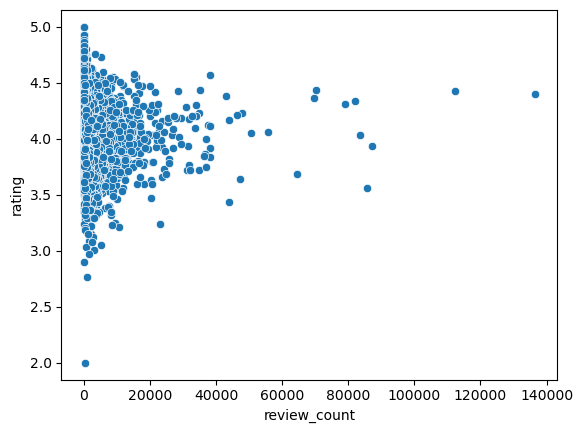

In [141]:
plt.show(sns.scatterplot(data=df_cleaned, x='review_count', y='rating'))

### Explanation
The correlation coefficient is relatively close to zero. The same is shown by the scatterplot. There is no clear linear tendency.

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [230]:
# your code here
numeric_cols = df_cleaned.select_dtypes(include='number').columns #Select only numeric columns for statistics
df_stats = df_cleaned[list(numeric_cols)].agg(['mean','median','std','min','max']) #.agg() is useful for showing statstical properties in a DataFrame
df_stats = df_stats.round(2) #Round for better readability
df_stats.loc[len(df_stats)] = list(zip(df_stats.loc['min'], df_stats.loc['max'])) #Zip min and max rows to get values for range: (min, max)
df_stats = df_stats.drop(['min', 'max']) #Rows for minimum an maximum have been used and can be removed
df_stats = df_stats.rename(index={5:'range'})
df_stats

,rating,review_count,year,rating_count
mean,4.04,2374.33,1969.09,51183.9
median,4.05,936.0,2002.0,18072.0
std,0.26,5493.09,185.38,137649.34
range,"(2.0, 5.0)","(0.0, 136455.0)","(-1500.0, 2014.0)","(5.0, 2958974.0)"


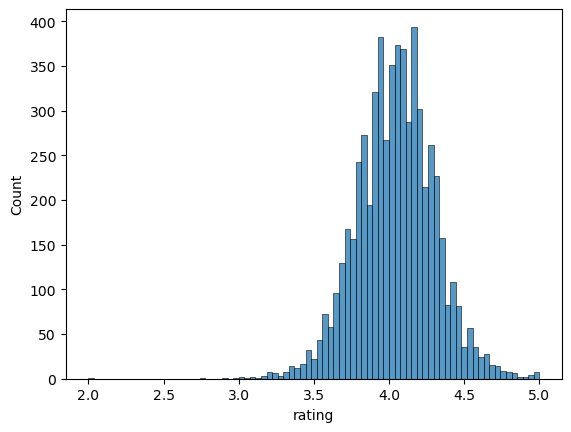

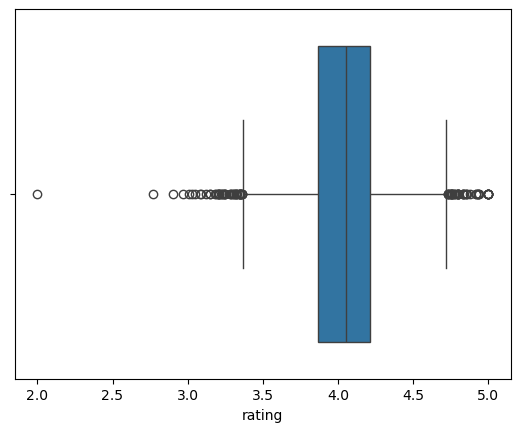

In [241]:
plt.show(sns.histplot(data = df_cleaned, x='rating'))
plt.show(sns.boxplot(data = df_cleaned, x='rating'))